In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missing

In [2]:
riskfactors = pd.read_csv("./data/riskfactors.csv")
riskfactors.head(2)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190.0,64.0,32.68,Married,NaN,0,6.0,...,No,NaN,NaN,NaN,1095.0,261.0,104.0,156.0,521.0,12.0
1,40,Female,48,170.0,68.0,25.90,Divorced,NaN,0,5.0,...,No,NaN,NaN,NaN,52.0,209.0,52.0,0.0,52.0,0.0


## Visualización de valores faltantes en dos variables

In [3]:
def column_fill_with_dummies(
        column: pd.Series,
        proportion_bellow: float= 0.10,
        jitter: float= 0.75,
        seed: int= 42
) -> pd.Series:
    column = column.copy(deep=True)

    # Extract values metadata
    missing_mask = column.isna()
    number_missing_values = missing_mask.sum()
    column_range = column.max() - column.min()

    # Shift data
    column_shift = column.min() - column.min() * proportion_bellow

    # Create the "jitter" (noise) to be added around the points
    np.random.seed(seed)
    column_jitter = (np.random.rand(number_missing_values) - 2) * column_range * jitter

    # Save new dummy data
    column[missing_mask] = column_shift + column_jitter

    return column

<Axes: xlabel='weight_lbs', ylabel='height_inch'>

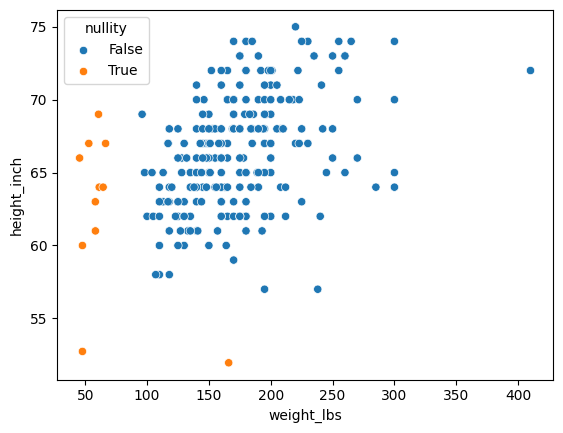

In [4]:
(
    riskfactors
    .select_dtypes(exclude=object)
    .pipe(
        lambda df: (
            df[df.columns[df.isna().any()]]
        )
    )
    .missing.bind_shadow_matrix(true_string= True, false_string= False)
    .apply(
        lambda column: column if "_NA" in column.name else column_fill_with_dummies(column, proportion_bellow=0.05, jitter= 0.075),
    )
    .assign(
        nullity= lambda df: df["weight_lbs_NA"] | df["height_inch_NA"]
    )
    .pipe(
        lambda df: (
            sns.scatterplot(
                data= df,
                x= 'weight_lbs',
                y= 'height_inch',
                hue= "nullity"
            )
        )
    )
)

<Axes: xlabel='weight_lbs', ylabel='height_inch'>

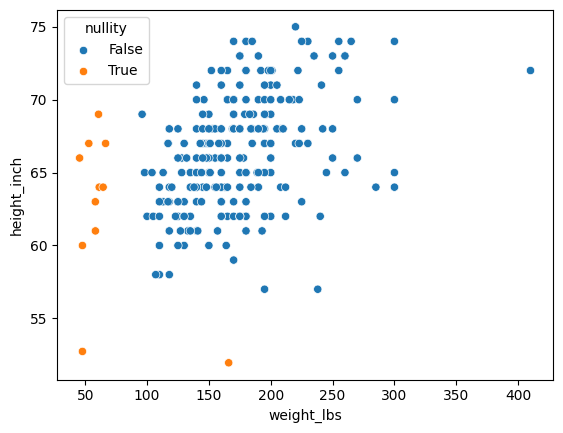

In [5]:
# Este método se introdujo a la librería MissingMethods para utilizarse directamente desde el DataFrame y
#       originalmente no está incluido. Revisar el archivo `missing.py` para entender el funcionamiento del método.

riskfactors.missing.missing_scatterplot(
    x= "weight_lbs",
    y= "height_inch",
    proportion_bellow=0.05,
    jitter= 0.075
)